In [1]:
import mne

In [2]:
thedata = mne.io.read_raw_edf('Darkcyan salamander.edf', preload=True)

Extracting EDF parameters from /Users/molfesepj/OneDrive/NIH/Kilroy/Darkcyan salamander.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156415  =      0.000 ...   610.996 secs...


In [3]:
thedata.set_montage('standard_1020')

<RawEDF | Darkcyan salamander.edf, 8 x 156416 (611.0 s), ~9.6 MB, data loaded>

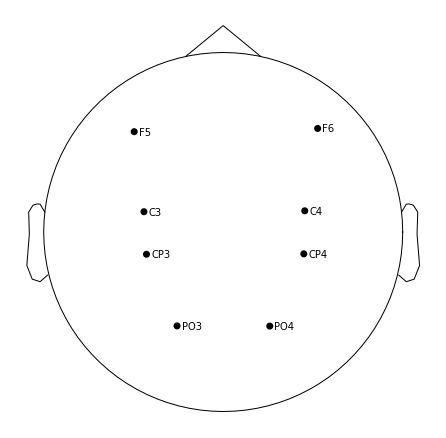

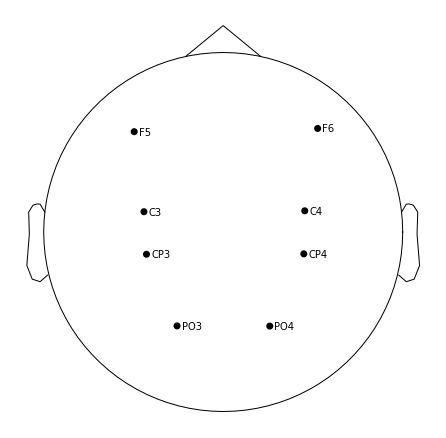

In [4]:
thedata.plot_sensors(ch_type='eeg', show_names=True)

In [5]:
thedata.ch_names

['CP3', 'C3', 'F5', 'PO3', 'PO4', 'F6', 'C4', 'CP4']

Using matplotlib as 2D backend.


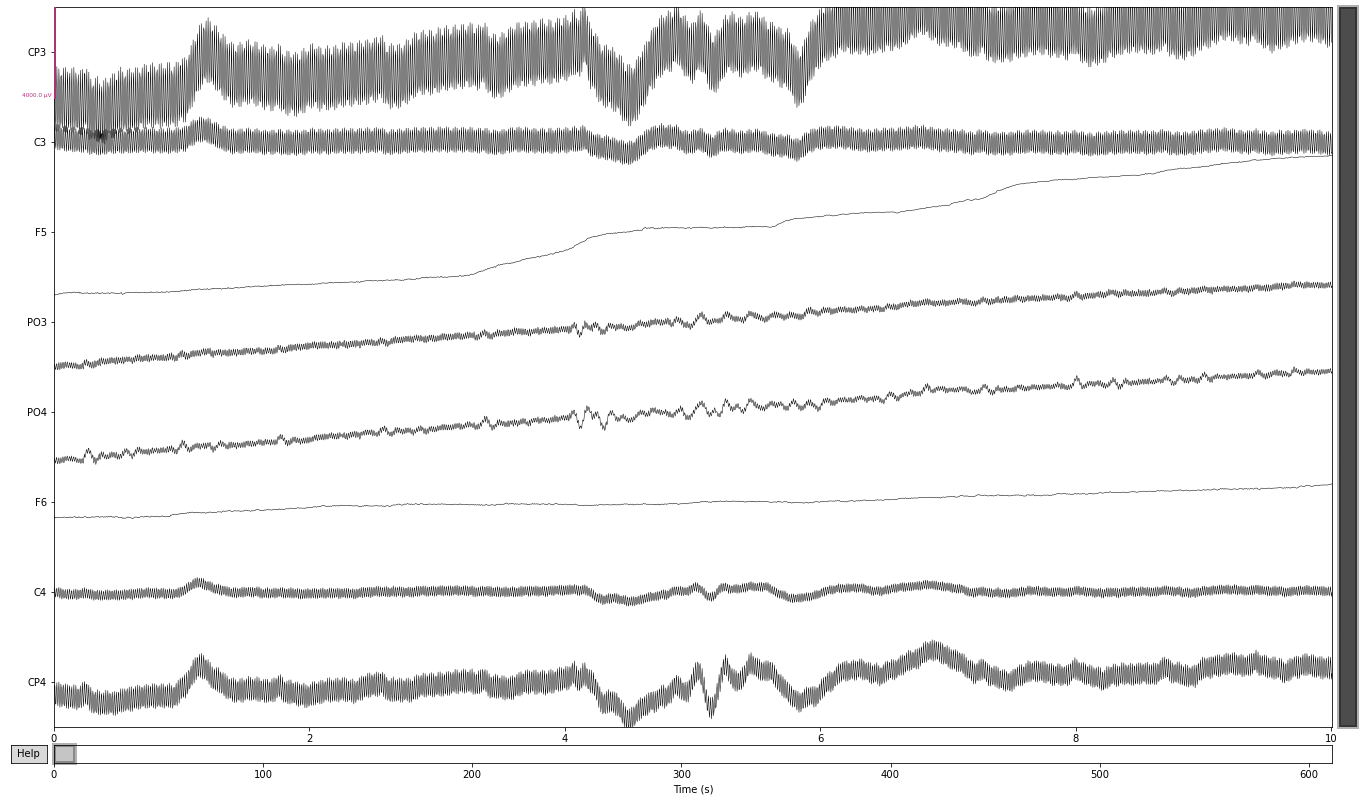

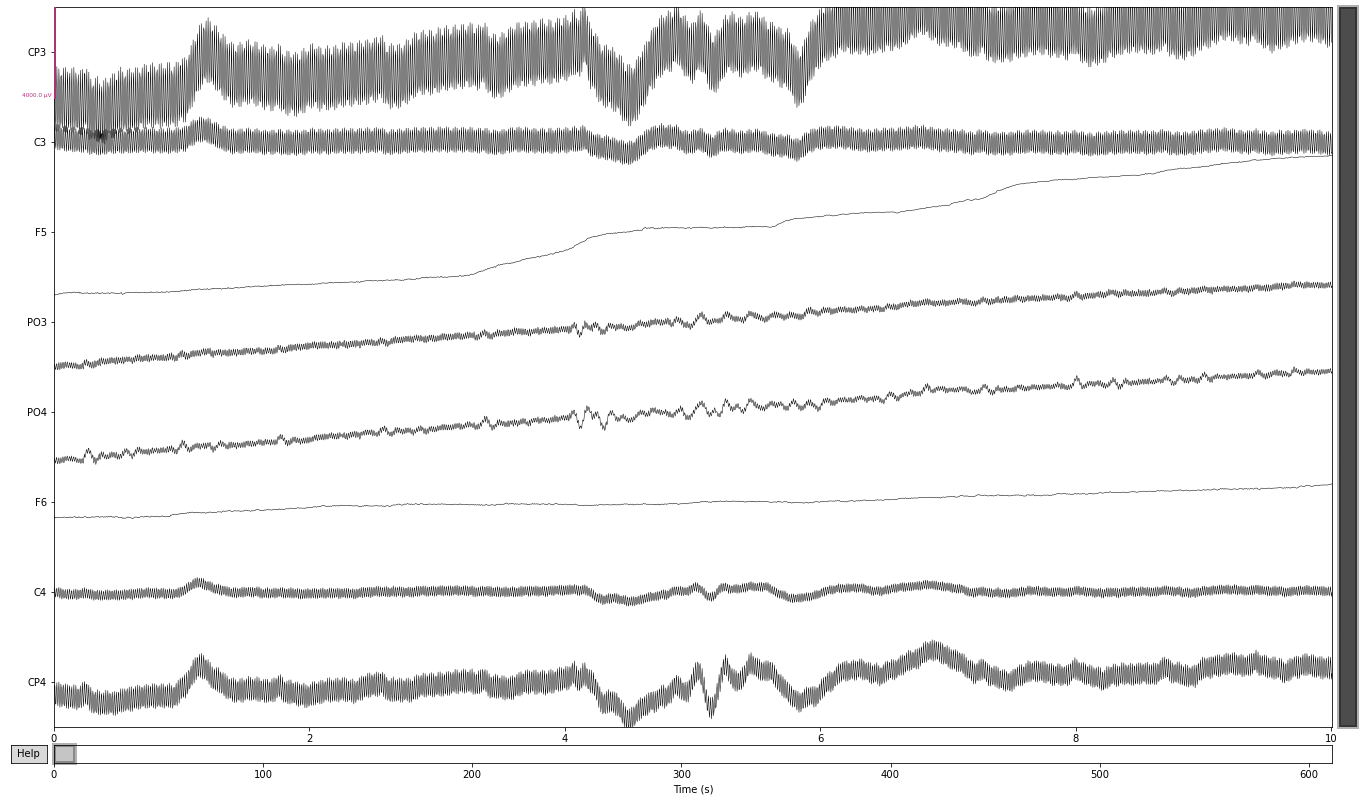

In [6]:
#let's just take a look at the data
scalers = dict(eeg=20e-4)
thedata.plot(scalings=scalers)

Effective window size : 8.000 (s)


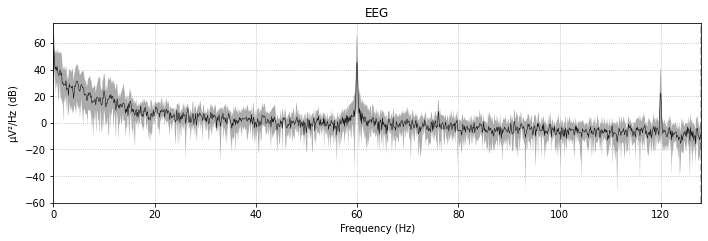

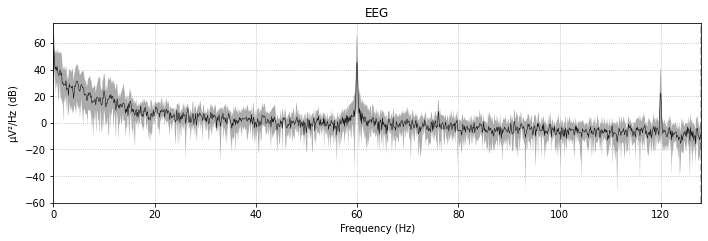

In [7]:
#shows us that you're getting some interference at 60Hz, so unfiltered
thedata.plot_psd(area_mode='range', tmax=8.0, average=True)

In [8]:
#filter the data down
filter_data = thedata.copy()
filter_data = filter_data.filter(l_freq=1.0,h_freq=40, n_jobs=2)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    1.2s finished


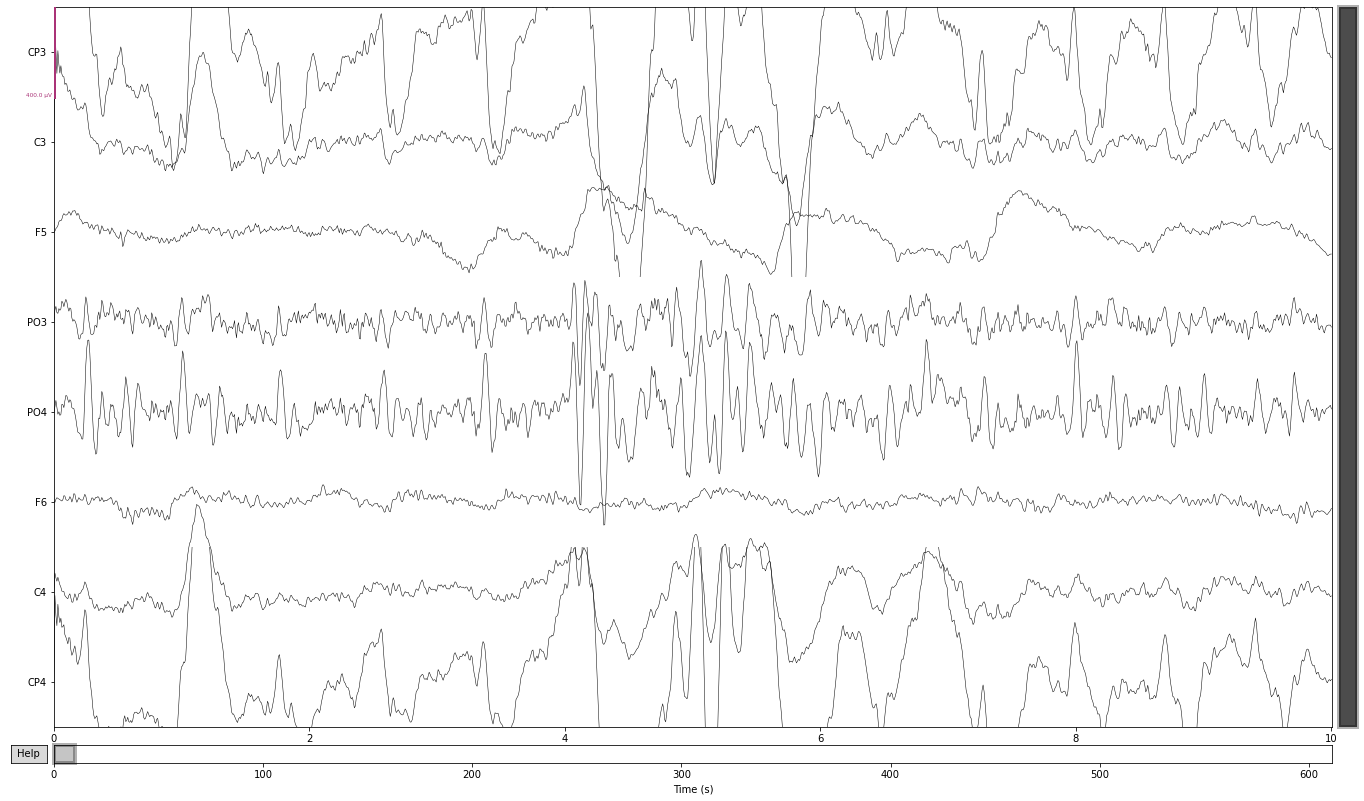

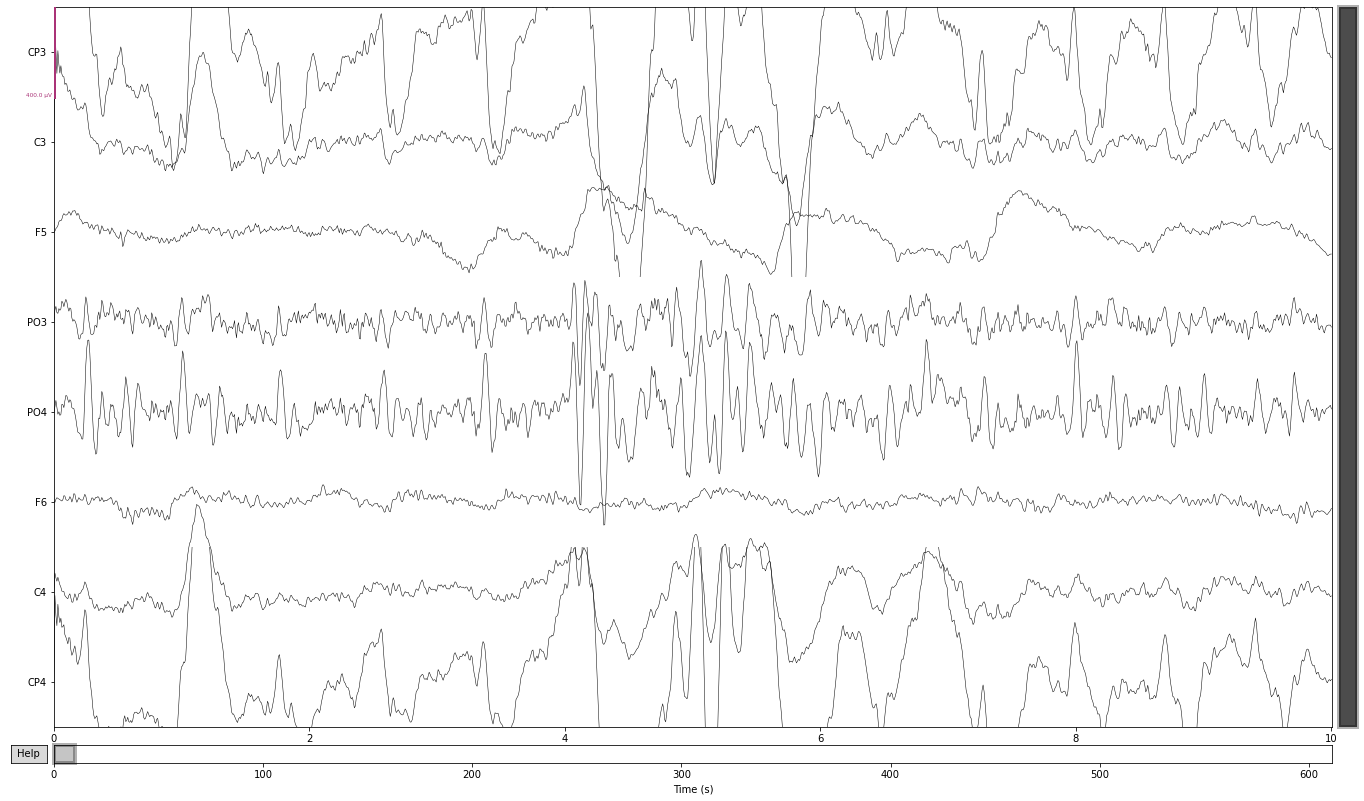

In [9]:
scalers = dict(eeg=20e-5)
filter_data.plot(scalings=scalers)

Effective window size : 8.000 (s)


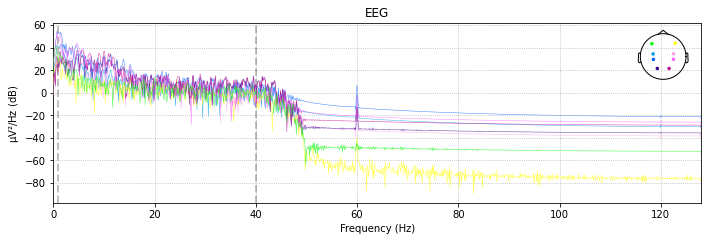

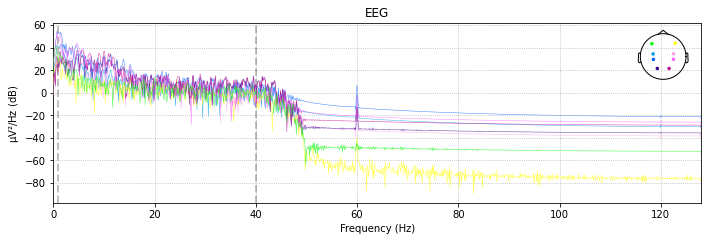

In [10]:
filter_data.plot_psd(area_mode='range', tmax=8.0, average=False)

In [12]:
#need to split file into equal parts
timepts = filter_data.n_times
timereal = timepts / 256
print(timepts)
print(timereal)

156416
611.0


In [16]:
epochs = mne.make_fixed_length_epochs(filter_data, duration=30, preload=True)

Not setting metadata
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Loading data for 20 events and 7680 original time points ...
0 bad epochs dropped


In [17]:
epochs

Number of events,20
Events,1: 20
Time range,0.000 – 29.996 sec
Baseline,off


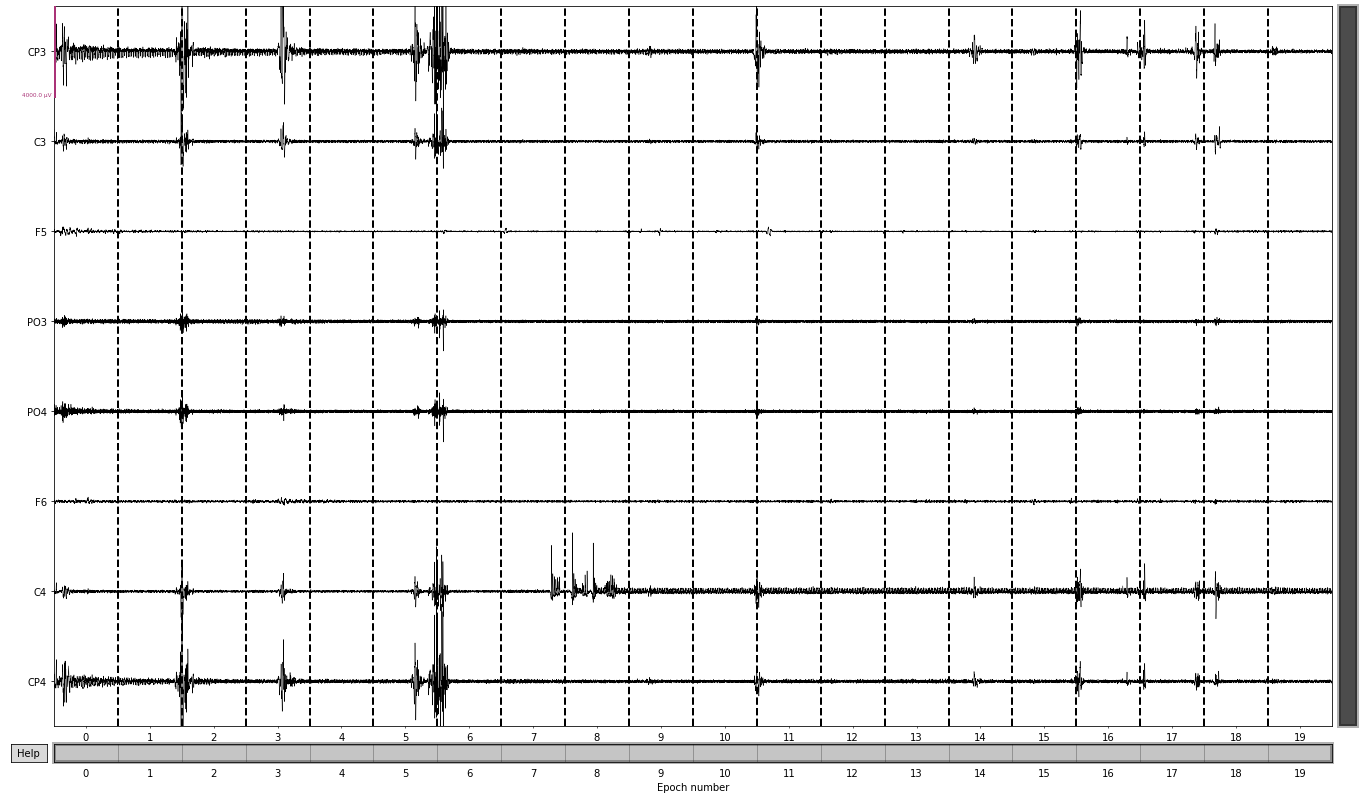

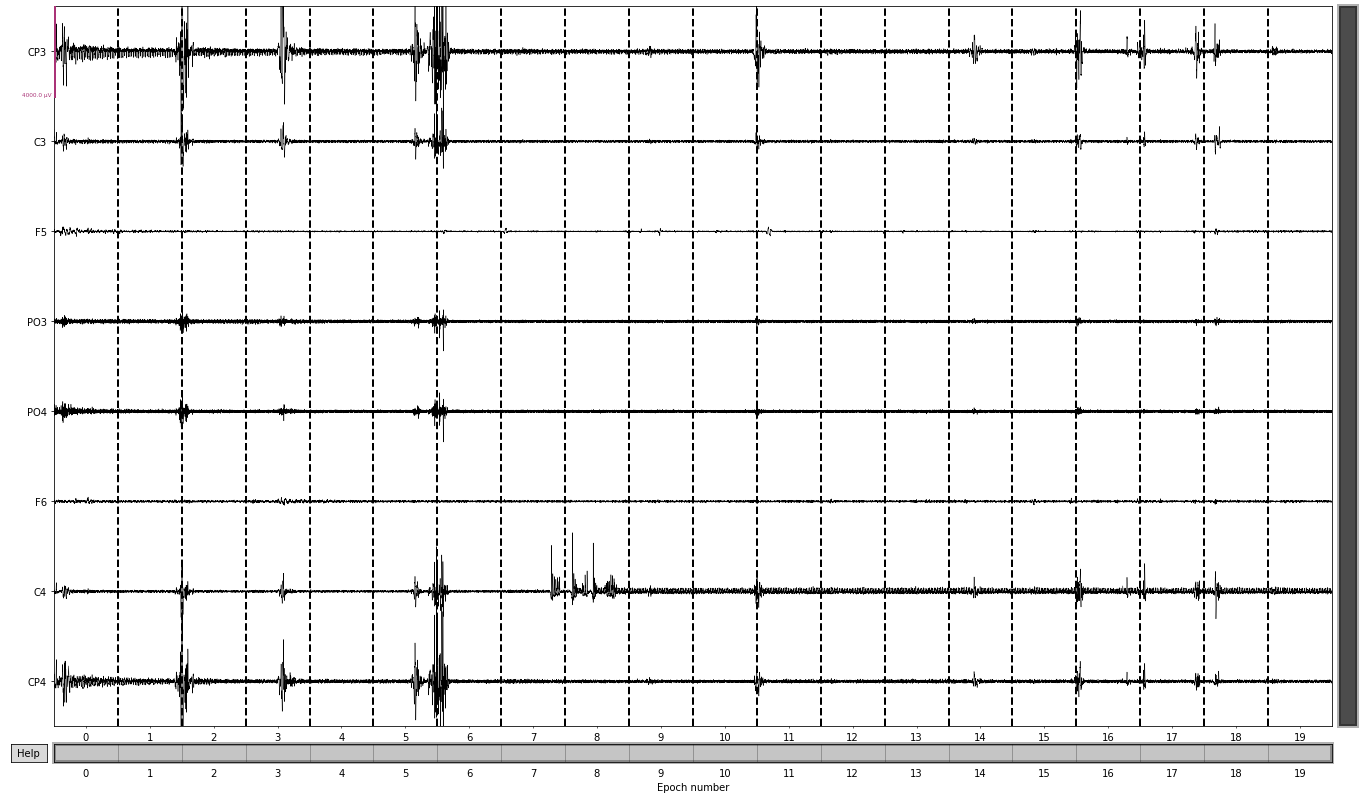

In [18]:
scalers = dict(eeg=20e-4)
epochs.plot(scalings=scalers)

In [ ]:
#split this into early and late epochs
epochs[0].plot_psd_topomap(ch_type='eeg', normalize=True)

In [ ]:
#split this into early and late epochs
epochs[5].plot_psd_topomap(ch_type='eeg', normalize=True)